## Jansen maze navigation task
This code implements a simplified environmentof the experiment described in Jansen et al., Nature Neuroscience 2024.


It simulates a 4x4 grid maze where an agent navigates from a starting position to a fixed reward position.

In [19]:
import random
import matplotlib.pyplot as plt
import numpy as np
import time

GRID_SIZE = 4
DIRECTIONS = {'w': (-1, 0), 's': (1, 0), 'd': (0, 1), 'a': (0, -1)}

class Maze:
    def __init__(self, size, reward_position):
        self.size = size
        self.grid = [[{'w': True, 's': True, 'd': True, 'a': True} for _ in range(size)] for _ in range(size)]
        self.visited = [[False for _ in range(size)] for _ in range(size)]
        self.path = []
        self.agent_position = (0, 0)
        self.reward_position = reward_position

    def is_valid(self, x, y):
        return 0 <= x < self.size and 0 <= y < self.size

    def remove_wall(self, x1, y1, x2, y2):
        if x1 == x2:
            if (y1 + 1) % self.size == y2:
                self.grid[x1][y1]['d'] = False
                self.grid[x2][y2]['a'] = False
            elif (y1 - 1) % self.size == y2:
                self.grid[x1][y1]['a'] = False
                self.grid[x2][y2]['d'] = False
        elif y1 == y2:
            if (x1 + 1) % self.size == x2:
                self.grid[x1][y1]['s'] = False
                self.grid[x2][y2]['w'] = False
            elif (x1 - 1) % self.size == x2:
                self.grid[x1][y1]['w'] = False
                self.grid[x2][y2]['s'] = False

    def walk_maze(self, x, y):
        self.visited[x][y] = True
        self.path.append((x, y))

        neighbors = []
        for direction, (dx, dy) in DIRECTIONS.items():
            nx, ny = (x + dx) % self.size, (y + dy) % self.size
            neighbors.append((nx, ny))

        random.shuffle(neighbors)

        for nx, ny in neighbors:
            if not self.visited[nx][ny]:
                self.remove_wall(x, y, nx, ny)
                self.walk_maze(nx, ny)
        for _ in range(random.randint(0,1)):
            random_x = random.randint(0, self.size - 1)
            random_y = random.randint(0, self.size - 1)
            direction = random.choice(list(DIRECTIONS.keys()))
            dx, dy = DIRECTIONS[direction]
            neighbor_x = (random_x + dx) % self.size
            neighbor_y = (random_y + dy) % self.size
            if self.is_valid(neighbor_x, neighbor_y):
                self.remove_wall(random_x, random_y, neighbor_x, neighbor_y)

    def draw_maze(self, cell_size=10, wall_thickness=1):
        maze_size = (cell_size + wall_thickness) * self.size + wall_thickness
        maze_image = np.zeros((maze_size, maze_size, 3))

        for x in range(self.size):
            for y in range(self.size):
                cell_x = (cell_size + wall_thickness) * x + wall_thickness
                cell_y = (cell_size + wall_thickness) * y + wall_thickness

                maze_image[cell_x:cell_x + cell_size, cell_y:cell_y + cell_size] = [1, 1, 1]

                if not self.grid[x][y]['w']:
                    maze_image[cell_x - wall_thickness:cell_x, cell_y:cell_y + cell_size] = [1, 1, 1]
                if not self.grid[x][y]['s']:
                    maze_image[cell_x + cell_size:cell_x + cell_size + wall_thickness, cell_y:cell_y + cell_size] = [1, 1, 1]
                if not self.grid[x][y]['a']:
                    maze_image[cell_x:cell_x + cell_size, cell_y - wall_thickness:cell_y] = [1, 1, 1]
                if not self.grid[x][y]['d']:
                    maze_image[cell_x:cell_x + cell_size, cell_y + cell_size:cell_y + cell_size + wall_thickness] = [1, 1, 1]

        agent_x, agent_y = self.agent_position
        agent_cell_x = (cell_size + wall_thickness) * agent_x + wall_thickness
        agent_cell_y = (cell_size + wall_thickness) * agent_y + wall_thickness
        maze_image[agent_cell_x:agent_cell_x + cell_size, agent_cell_y:agent_cell_y + cell_size] = [1, 0, 0]

        reward_x, reward_y = self.reward_position
        reward_cell_x = (cell_size + wall_thickness) * reward_x + wall_thickness
        reward_cell_y = (cell_size + wall_thickness) * reward_y + wall_thickness
        maze_image[reward_cell_x:reward_cell_x + cell_size, reward_cell_y:reward_cell_y + cell_size] = [1, 1, 1]

        plt.imshow(maze_image)
        plt.axis('off')
        plt.show()

    def move_agent(self, direction):
        if direction in DIRECTIONS:
            dx, dy = DIRECTIONS[direction]
            x, y = self.agent_position
            current_cell = self.grid[x][y]

            if not current_cell[direction]:
                new_x = (x + dx) % self.size
                new_y = (y + dy) % self.size
                self.agent_position = (new_x, new_y)
            else:
                print("Wall!!")


In [20]:
def run_maze_trials(grid_size, num_trials):
    """
    Runs the maze for a specified number of trials and displays the results.

    Parameters:
        grid_size (int): The size of the grid (e.g., 4 for a 4x4 grid).
        num_trials (int): The number of trials to run.

    Returns:
        results (list): A list of dictionaries containing trial results.
    """
    fixed_reward_position = (np.random.randint(0, grid_size), np.random.randint(0, grid_size))
    results = []  # To store results for all trials

    for trial in range(1, num_trials + 1):  # Run the specified number of trials
        print(f"Trial {trial} starting...")
        maze = Maze(grid_size, reward_position=fixed_reward_position)
        maze.walk_maze(0, 0)
        steps = 0
        start_time = time.time()

        while True:
            maze.draw_maze()
            move = input("Enter wsda:")
            if move in ['w', 's', 'd', 'a']:
                maze.move_agent(move)
                steps += 1
                if maze.agent_position == maze.reward_position:
                    print("============================\n \n \n \n \n \n \n           REWARD        \n \n \n \n \n \n \n============================")
                    break
            else:
                print("Invalid input. Use w, s, d, or a.")

        elapsed_time = time.time() - start_time

        results.append({
            "Trial": trial,
            "Time Elapsed (s)": round(elapsed_time, 2),
            "Steps Taken": steps
        })

    # Print summary of results
    print("\nSummary of Results:")
    for result in results:
        print(f"Trial {result['Trial']}: Time = {result['Time Elapsed (s)']}s, Steps = {result['Steps Taken']}")

    return results

In [21]:
import random

def run_maze_trials(grid_size, num_trials):
    """
    Runs the maze for a specified number of trials and displays the results.

    Parameters:
        grid_size (int): The size of the grid (e.g., 4 for a 4x4 grid).
        num_trials (int): The number of trials to run.

    Returns:
        results (list): A list of dictionaries containing trial results.
    """
    fixed_reward_position = (np.random.randint(0, grid_size), np.random.randint(0, grid_size))
    results = []  # To store results for all trials

    # List of random ASCII art for reward
    reward_ascii_art = [
        r"""
        ============================
            🎉   REWARD!   🎉
            _\|      __     |/_
          _-  \_   _/"->   _/  -_
          -_    `-'(   )`-'    _-
            `=.__.=-(   )-=.__.='
                    |/-\|
        cjr         Y   Y
        """,
        r"""
        ============================
            🏆 REWARD! 🏆
              .-~~``~~-,
              (          \
          .--'`-.__,     \
          /      |\O/      |
        |,      /         |
        \   ,--`\         |
          `.(   /          \
              /            \
              / .  ;    :.   \
            /__;   \   | \   \
            /   '. |\_ /-.'-._\
            |      `   `        \
            |    /               \
            |    |                |
            |    |                \
            \    \                 |
            \    |  |   |   \     \
              \   \  \   \    \     |
              '.  \  \  ' \   \     \
                \  \  `\   `\  `\    \
                  |  `\  `\   `.  '.   \
                  \   `-. '._  '-. '._/\
                    |     \-._;-._ '-._  \
                    \      `\     `--` `--\
                    ;_      `-.           |
        ~==~==jgs==~,-.-.-'`;'=~=-.,_   __/=~=~=~~=
          =_ = -_ -( ( ( .-`( ( ( .-``"`-_ = - _ -
        - -   =   - ` ` ` _= ` ` `   =  -  -    =
        ~~==~=~~==~=~~=~~=~=~==~~=~~==~~=~~=~~~===~~
                                \ . \  . '|
                                  \   . .' /
                                  '.   \.'|
                                    '-.__/
        ============================
        """,
        r"""
        ============================
            🌟 FANTASTIC! 🌟

                                /T /I
                                / |/ | .-~/
                            T\ Y  I  |/  /  _
          /T               | \I  |  I  Y.-~/
          I l   /I       T\ |  |  l  |  T  /
  __  | \l   \l  \I l __l  l   \   `  _. |
  \ ~-l  `\   `\  \  \\ ~\  \   `. .-~   |
    \   ~-. "-.  `  \  ^._ ^. "-.  /  \   |
  .--~-._  ~-  `  _  ~-_.-"-." ._ /._ ." ./
  >--.  ~-.   ._  ~>-"    "\\   7   7   ]
  ^.___~"--._    ~-{  .-~ .  `\ Y . /    |
  <__ ~"-.  ~       /_/   \   \I  Y   : |
    ^-.__           ~(_/   \   >._:   | l______
        ^--.,___.-~"  /_/   !  `-.~"--l_ /     ~"-.
                (_/ .  ~(   /'     "~"--,Y   -=b-. _)
                (_/ .  \  :           / l      c"~o
                  \ /    `.    .     .^   \_.-~"~--.  )
                  (_/ .   `  /     /       !       )/
                    / / _.   '.   .':      /        '
                    ~(_/ .   /    _  `  .-<_      -Row
                      /_/ . ' .-~" `.  / \  \          ,z=.
                      ~( /   '  :   | K   "-.~-.______//
                        "-,.    l   I/ \_    __{--->._(==.
                        //(     \  <    ~"~"     //
                        /' /\     \  \     ,v=.  ((
                      .^. / /\     "  }__ //===-  `
                    / / ' '  "-.,__ {---(==-
                  .^ '       :  T  ~"   ll
                  / .  .  . : | :!        \\
                (_/  /   | | j-"          ~^
                  ~-<_(_.^-~"
        ============================
        """,
        r"""
        ============================
                      | o     |
                      |       |
                   _  | |  () |
                  ( '=| |     |
                 /  ( |     | |
                / / |/|   |   |
                |/\ |/|       |
                   \\ | ()    |
                    \\|    |  |
                      |    |  |
                      |       |
                      |  |    |
            -dana`98- |       |
        ============================
        """,
        r"""
                                                                    ___
                                             ________.-----''
                                    ___.--'""___.----''
                                 .-'    _.-'"
                      _ .-.__.--'    .-'
                    .' `  / ' __ _.-'
                    ) '  '   )   /`-._.
                   (.'\          )/))-)\
                 .'    >.________.--'
              .-'   .-'
            .'    .'
         .-'   .-'
       .'    .'
      /    .'
    .'   .'           _    _ _           _
   /  ,,/            / \  | | |__   __ _| |_ _ __ ___  ___ ___
  /'''/             / _ \ | | '_ \ / _` | __| '__/ _ \/ __/ __|
 / ,''             / ___ \| | |_) | (_| | |_| | | (_) \__ \__ \
/''     VK        /_/   \_\_|_.__/ \__,_|\__|_|  \___/|___/___/
        """,
        r"""
        ============================
            🌟 FANTASTIC! 🌟

        ...._ ..,,-======-.
          `''<<::   o.      `\
              `-."      .cdbc`.
                  ;      ?$$$$$b.
                  ;...  .d$$$$$$!>
                .$$$$$$P"??$$??!!!!>.
              ,$$$$$$P   .?!!!!!!!!!>
              $$$$$$$k  !!!!!!!!!!!!!!>
              d$$$$$$$$   !!!!!!!!!!!!!!:
            d$$$$$$$$$F '!!!!!!!!!!!!!!!:
            d$$$$$$$$$$  '!!!!!!!!!!!!!!!!>
            $$$$$$$$$$$L !!!!!!!!!!!!!!!!!!
          d$$$$$$$$$$$$ '!!!!!!!!!!!!!!!!!!
          d$$$$$$$$$$$$ !!!!!XX!!!!!!!!!!!!!
          d$$$$$$$$$$$$x!!!!!!#X!!!!!!!!!!!!>
          3$$$$$$$$$$$$!!!!!!!!$!!!!!!!!!!!!!
          ?$$$$$$$$$$$!!!!!!!!!$!!!!!!!!!!!!!>
          ?$$$$$$$$$$?!!!!!!!Xd!!!!!!!!!!!!!!>
            $$$$$$$$$?!!!!!!!WT!!!!!!!!!!!!!!!!
            ?$$$$$$$F!!!!!!!td!!!!!!!!!!!!!!!!!
            $$$$$$$!!!!!!!Ud!!!!!!!!!!!!!!!!!!
            ?$$$$$$!!!!!!W?!!!!!!!!!!!!!!!!!!!>
              $$$$$C!!!!!!E!!!!!!!!!!!!!!!!!!!!>
              ?$$$$$!!!!!!E!!!!!!!!!!!!!!!!!!!!>
              $$$$$X!!!!!!!!!!!!!!!!!!!!!!!!!!>
                $$$$b!!!!9!!!!!!!!!!!!!!!!!!!!!>
                `$$$$$C!!9!!!!!!!!!!!!!!!!!!!!!
                ?$$$$$$bUi!!!!!!!!!!!!!!!!!!!!
                `$$$$$$$$$$$$$b!!!!!!!!!!!!!!!
                  ?$$$$$$$$$$$$$f!!!!!!!!!!!!!!
                  $$$$$$$$$$$$$)!!!!!!!!!!!!!>
                    ?$$$$$$$$$$F!!!!!!!!!!!!!!!
                    "$$$$$$$$$!!!!!!!!!!!!!!!!
                      "$$$$$$$!!!!!!!!!!!!!!!!!;
                        ?$$$$$%!!!!!!!!!!!!!!!!!!;
                        $$$$$!!!!!!!!!!!!!!!!!!!!!
                        `$$$$P?(`-,      `'(-(-`<>.\'-
                      ,;<(?$$$$-";);         `\\ \.<\.'
                =<;<<;(<;'?$P"````            `` ` '`
        ============================
        """,
        """
        #############################################
        ############__---~~~~~|~~~~~--__#############
        ########.-~~          |          ~~-.########
        #####.-~     .-~~~~-. |              ~-.#####
        ####/       {  o     }|                 \####
        ###/        /       / |                  \###
        ##|        `--r'   {  | ,___.-',          |##
        ##|          /      ~-|         ',        |##
        ##|---------{---------|----------'--------|##
        ##|          \        |         /         |##
        ##|           \       |        /          |##
        ###\         ~ ~~~~~~~|~~~~~~~~~ ~       /###
        ####\       ~ ~ ~ ~ ~ | ~ ~ ~ ~ ~ ~     /####
        #####`-_     ~ ~ ~ ~ ~|~ ~ ~ ~ ~ ~    _-'####
        ########`-__    ~ ~ ~ | ~ ~ ~ ~   __-'#######
        ############~~---_____|_____---~~############
        #############################################
        """,
        """
              ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⣿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡾⠋⠉⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⠃⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⣠⠖⠲⢤⡖⠒⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⢀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⢀⣀⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠸⣄⠀⠁⣠⠞⠉⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⣠⣤⣤⣤⣤⠀⠀
      ⠀⡞⠉⠻⠁⢹⠀⠀⡏⠀⠀⠀⠀⢸⠃⠀⠀⠀⠀⠀⠀⠀⠀⠹⣶⠋⠀⠀⠀⠀⣀⡤⠴⠒⠊⠉⠉⠀⠀⣿⣿⣿⠿⠋⠀⠀
      ⠀⠳⢤⡀⠀⡞⠁⠀⡇⠀⠀⢀⡠⠼⠴⠒⠒⠒⠒⠦⠤⠤⣄⣀⠀⢀⣠⠴⠚⠉⠀⠀⠀⠀⠀⠀⠀⠀⣼⠿⠋⠁⠀⠀⠀⠀
      ⠀⠀⠀⠈⠷⡏⠀⠀⣇⠔⠂⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢨⠿⠋⠀⠀⠀⠀⠀⠀⠀⠀⣀⡤⠖⠋⠁⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⢰⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣠⠤⠒⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⢀⡟⠀⣠⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⢻⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣤⣤⡤⠤⢴
      ⠀⠀⠀⠀⠀⠀⣸⠁⣾⣿⣀⣽⡆⠀⠀⠀⠀⠀⠀⠀⢠⣾⠉⢿⣦⠀⠀⠀⢸⡀⠀⠀⢀⣠⠤⠔⠒⠋⠉⠉⠀⠀⠀⠀⢀⡞
      ⠀⠀⠀⠀⠀⢀⡏⠀⠹⠿⠿⠟⠁⠀⠰⠦⠀⠀⠀⠀⠸⣿⣿⣿⡿⠀⠀⠀⢘⡧⠖⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀
      ⠀⠀⠀⠀⠀⣼⠦⣄⠀⠀⢠⣀⣀⣴⠟⠶⣄⡀⠀⠀⡀⠀⠉⠁⠀⠀⠀⠀⢸⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⠁⠀
      ⠀⠀⠀⠀⢰⡇⠀⠈⡇⠀⠀⠸⡾⠁⠀⠀⠀⠉⠉⡏⠀⠀⠀⣠⠖⠉⠓⢤⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀
      ⠀⠀⠀⠀⠀⢧⣀⡼⠃⠀⠀⠀⢧⠀⠀⠀⠀⠀⢸⠃⠀⠀⠀⣧⠀⠀⠀⣸⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡰⠃⠀⠀⠀
      ⠀⠀⠀⠀⠀⠈⢧⡀⠀⠀⠀⠀⠘⣆⠀⠀⠀⢠⠏⠀⠀⠀⠀⠈⠳⠤⠖⠃⡟⠀⠀⠀⢾⠛⠛⠛⠛⠛⠛⠛⠛⠁⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠙⣆⠀⠀⠀⠀⠈⠦⣀⡴⠋⠀⠀⠀⠀⠀⠀⠀⠀⢀⣼⠙⢦⠀⠀⠘⡇⠀⠀⠀⠀⠀⠀⢀⣀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⢠⡇⠙⠦⣄⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⠴⠋⠸⡇⠈⢳⡀⠀⢹⡀⠀⠀⠀⢀⡞⠁⠉⣇⣀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⡼⣀⠀⠀⠈⠙⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠉⠀⠀⠀⠀⣷⠴⠚⠁⠀⣀⣷⠀⠀⠀⢠⠇⠀⠀⠀⠀⠀⣳
      ⠀⠀⠀⠀⠀⠀⡴⠁⡏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣆⡴⠚⠉⠉⠀⠀⠀⠀⢸⠃⣀⣠⠤⠤⠖⠋
      ⣼⢷⡆⠀⣠⡴⠧⣄⣇⠀⠀⠀⠀⡴⠚⠙⠲⠞⠛⠙⡆⠀⠀⠀⠀⠀⢀⡇⣠⣽⢦⣄⢀⣴⣶⠀⠋⠉⠀⠀⠀⠀⠀⠀⠀⠀
      ⡿⣼⣽⡞⠁⠀⠀⠀⢹⡀⠀⠀⠀⢹⠀⠀⠀⠀⠀⠀⣸⠀⠀⠀⠀⠀⣼⠉⠁⠀⠀⢠⢟⣿⣿⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⣷⠉⠁⢳⠀⠀⠀⠀⠈⣧⠀⠀⠀⠀⠙⢦⠀⠀⠀⡠⠁⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠏⠀⠀⡿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠹⡆⠀⠈⡇⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⠹⣧⠞⠁⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⠀⠀⠀⣸⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⢳⡀⠀⠙⠀⠀⠀⠀⠀⠘⣆⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⣰⠃⠀⠀⠀⠀⢀⡄⠀⢠⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⢳⡀⣰⣀⣀⣀⠀⠀⠀⠘⣦⣀⠀⠀⠀⡇⠀⠀⠀⢀⡴⠃⠀⠀⠀⠀⠀⢸⡇⢠⠏⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠉⠉⠀⠀⠈⠉⠉⠉⠙⠻⠿⠾⠾⠻⠓⢦⠦⡶⡶⠿⠛⠛⠓⠒⠒⠚⠛⠛⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      """,
    ]

    for trial in range(1, num_trials + 1):  # Run the specified number of trials
        print(f"Trial {trial} starting...")
        maze = Maze(grid_size, reward_position=fixed_reward_position)
        maze.walk_maze(0, 0)
        steps = 0
        start_time = time.time()

        while True:
            maze.draw_maze()
            move = input("Enter wsda:")
            if move in ['w', 's', 'd', 'a']:
                maze.move_agent(move)
                print("""












                """)
                steps += 1
                if maze.agent_position == maze.reward_position:
                    print(random.choice(reward_ascii_art))  # Print random reward message
                    break
            else:
                print("Invalid input. Use w, s, d, or a.")

        elapsed_time = time.time() - start_time

        results.append({
            "Trial": trial,
            "Time Elapsed (s)": round(elapsed_time, 2),
            "Steps Taken": steps
        })

    # Print summary of results
    print("\nSummary of Results:")
    for result in results:
        print(f"Trial {result['Trial']}: Time = {result['Time Elapsed (s)']}s, Steps = {result['Steps Taken']}")

    return results


# 🕹️ task controls

- **move the agent (red square) to the reward (hidden):**
  - ⬆️ **W**: Move Up
  - ⬇️ **S**: Move Down
  - ⬅️ **A**: Move Left
  - ➡️  **D**: Move Right

🎯 **Objective**: Reach the reward as quickly as possible!


Trial 1 starting...


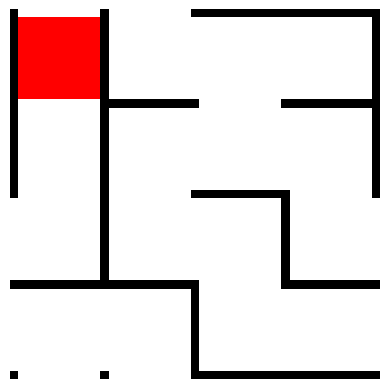

Enter wsda:s

                
                
                









                


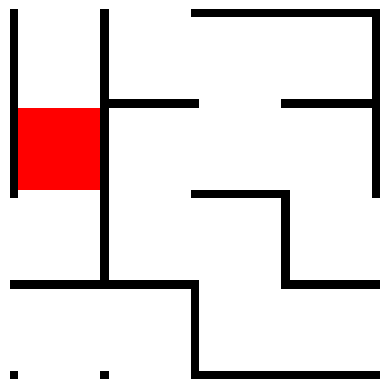

Enter wsda:s

                
                
                









                

        #############################################
        ############__---~~~~~|~~~~~--__#############
        ########.-~~          |          ~~-.########
        #####.-~     .-~~~~-. |              ~-.#####
        ####/       {  o     }|                 \####
        ###/        /       / |                  \###
        ##|        `--r'   {  | ,___.-',          |##
        ##|          /      ~-|         ',        |##
        ##|---------{---------|----------'--------|##
        ##|          \        |         /         |##
        ##|           \       |        /          |##
        ###\         ~ ~~~~~~~|~~~~~~~~~ ~       /###
        ####\       ~ ~ ~ ~ ~ | ~ ~ ~ ~ ~ ~     /####
        #####`-_     ~ ~ ~ ~ ~|~ ~ ~ ~ ~ ~    _-'####
        ########`-__    ~ ~ ~ | ~ ~ ~ ~   __-'#######
        ############~~---_____|_____---~~############
        ####################################

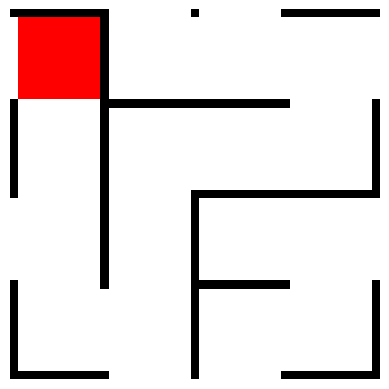

Enter wsda:s

                
                
                









                


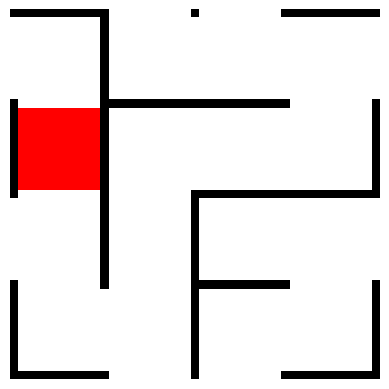

Enter wsda:s

                
                
                









                

            🎉   REWARD!   🎉
            _\|      __     |/_
          _-  \_   _/"->   _/  -_
          -_    `-'(   )`-'    _-
            `=.__.=-(   )-=.__.='
                    |/-\|
        cjr         Y   Y
        
Trial 3 starting...


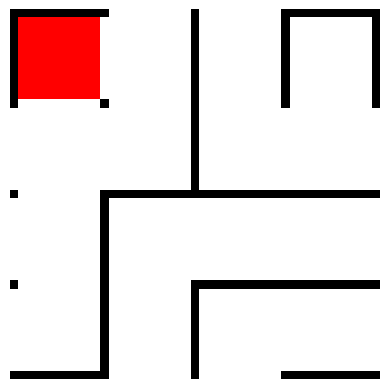

Enter wsda:s

                
                
                









                


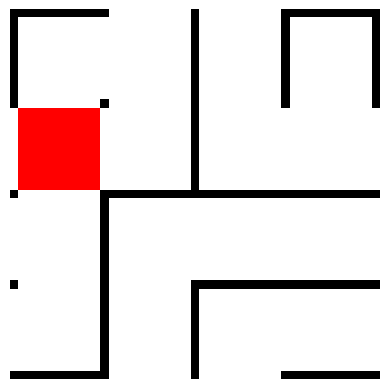

Enter wsda:d

                
                
                









                


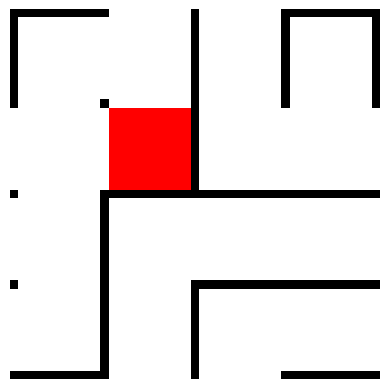

Enter wsda:w

                
                
                









                


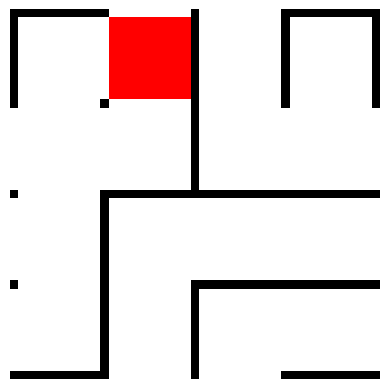

Enter wsda:a

                
                
                









                


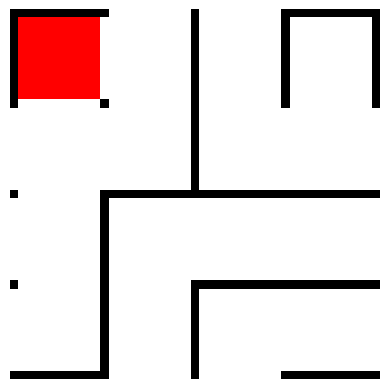

Enter wsda:s

                
                
                









                


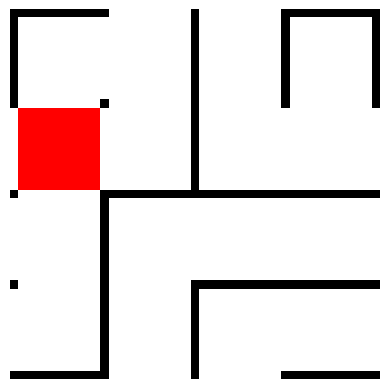

Enter wsda:s

                
                
                









                

              ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣴⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⣿⣧⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣾⣿⣿⣿⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡾⠋⠉⠀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⠀⣼⠃⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⣠⠖⠲⢤⡖⠒⣆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⠀⢀⡏⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⡏⠀⠀⠀⠀⠀⢀⡇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⢀⣀⠀⠀⢸⠀⠀⠀⠀⠀⡇⠀⠀⠀⠀⠀⠀⠸⣄⠀⠁⣠⠞⠉⠀⠀⠀⠀⠀⠀⠀⠀⢀⣀⣀⣠⣤⣤⣤⣤⠀⠀
      ⠀⡞⠉⠻⠁⢹⠀⠀⡏⠀⠀⠀⠀⢸⠃⠀⠀⠀⠀⠀⠀⠀⠀⠹⣶⠋⠀⠀⠀⠀⣀⡤⠴⠒⠊⠉⠉⠀⠀⣿⣿⣿⠿⠋⠀⠀
      ⠀⠳⢤⡀⠀⡞⠁⠀⡇⠀⠀⢀⡠⠼⠴⠒⠒⠒⠒⠦⠤⠤⣄⣀⠀⢀⣠⠴⠚⠉⠀⠀⠀⠀⠀⠀⠀⠀⣼⠿⠋⠁⠀⠀⠀⠀
      ⠀⠀⠀⠈⠷⡏⠀⠀⣇⠔⠂⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢨⠿⠋⠀⠀⠀⠀⠀⠀⠀⠀⣀⡤⠖⠋⠁⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⠀⢰⠋⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣠⠤⠒⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
      ⠀⠀⠀⠀⠀⠀⢀⡟⠀⣠⣄⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⢻⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣠⣤⣤⡤⠤⢴
      ⠀⠀⠀⠀⠀⠀⣸⠁⣾⣿⣀⣽⡆⠀⠀⠀⠀⠀⠀⠀⢠⣾⠉⢿⣦⠀⠀⠀⢸⡀⠀⠀⢀⣠⠤⠔⠒⠋⠉⠉⠀⠀⠀⠀⢀⡞
      ⠀⠀⠀⠀⠀⢀⡏⠀⠹⠿⠿⠟⠁⠀⠰⠦⠀⠀⠀⠀⠸⣿⣿⣿⡿⠀⠀⠀⢘⡧⠖⠋⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡼⠀
      ⠀⠀⠀⠀⠀⣼⠦⣄⠀⠀⢠⣀⣀⣴⠟⠶⣄⡀⠀⠀⡀⠀⠉⠁⠀⠀⠀⠀⢸⠇⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣸⠁⠀
      ⠀⠀⠀⠀⢰⡇⠀⠈⡇⠀⠀⠸⡾⠁⠀⠀⠀⠉⠉⡏⠀⠀⠀⣠⠖⠉⠓⢤⢸⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣰⠃⠀⠀
      ⠀⠀⠀⠀⠀⢧⣀⡼⠃⠀⠀⠀⢧⠀⠀⠀⠀⠀⢸⠃⠀⠀⠀⣧⠀⠀⠀⣸⢹⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡰⠃⠀⠀⠀

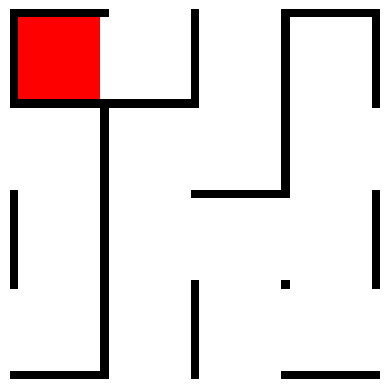

Enter wsda:d

                
                
                









                


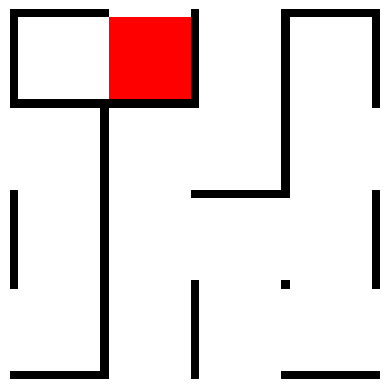

Enter wsda:w

                
                
                









                


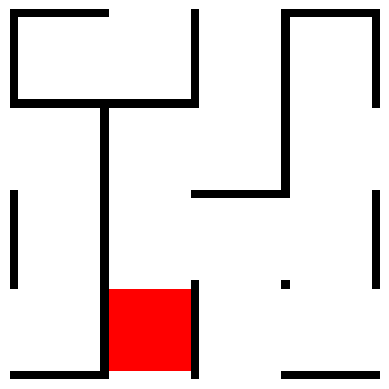

Enter wsda:w

                
                
                









                


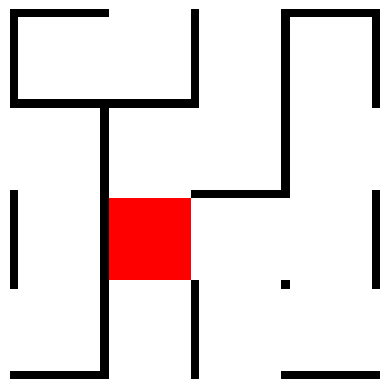

Enter wsda:d

                
                
                









                


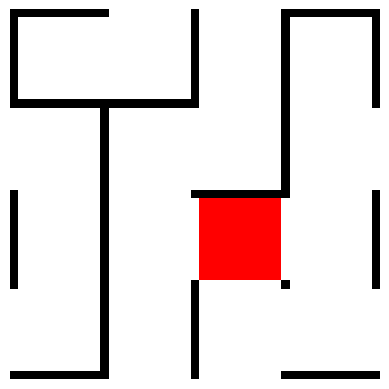

Enter wsda:s

                
                
                









                


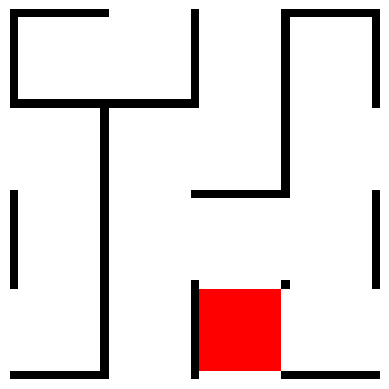

Enter wsda:d

                
                
                









                


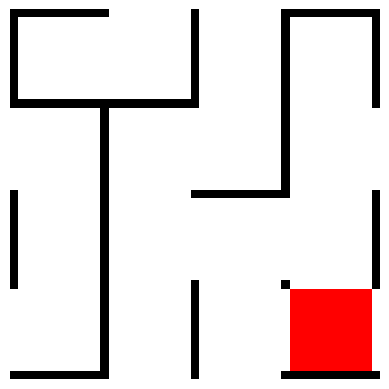

Enter wsda:d

                
                
                









                


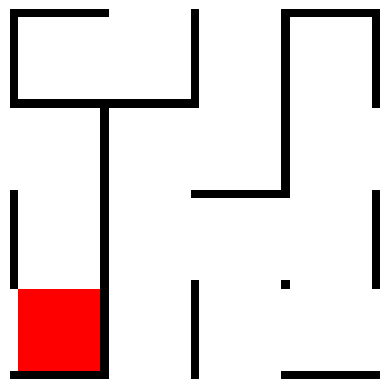

Enter wsda:w

                
                
                









                

            🌟 FANTASTIC! 🌟

                                /T /I          
                                / |/ | .-~/    
                            T\ Y  I  |/  /  _  
          /T               | \I  |  I  Y.-~/  
          I l   /I       T\ |  |  l  |  T  /   
  __  | \l   \l  \I l __l  l   \   `  _. |    
  \ ~-l  `\   `\  \  \\ ~\  \   `. .-~   |    
    \   ~-. "-.  `  \  ^._ ^. "-.  /  \   |    
  .--~-._  ~-  `  _  ~-_.-"-." ._ /._ ." ./    
  >--.  ~-.   ._  ~>-"    "\\   7   7   ]     
  ^.___~"--._    ~-{  .-~ .  `\ Y . /    |     
  <__ ~"-.  ~       /_/   \   \I  Y   : |
    ^-.__           ~(_/   \   >._:   | l______     
        ^--.,___.-~"  /_/   !  `-.~"--l_ /     ~"-.  
                (_/ .  ~(   /'     "~"--,Y   -=b-. _) 
                (_/ .  \  :           / l      c"~o 
                  \ /    `.    .     .^   \_.-~"~--.  ) 
                  (_/ .   `  /     /      

In [22]:
if __name__ == "__main__":
    run_maze_trials(grid_size=4, num_trials=4)